<a href="https://colab.research.google.com/github/Khrlumam31/MSIB-K2-KelasAwanPintar/blob/main/ML_6__AIJ0202S2302_C01_Non_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-6 Non-Hierarchical Clustering

# Import Library

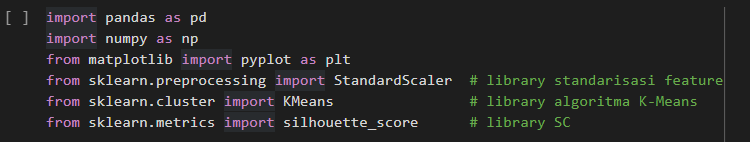

In [39]:
# Tulis di sini
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Menginstal library machine learning visualization: [yellowbrick](https://www.scikit-yb.org/en/latest/).

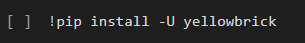

In [40]:
# Tulis di sini
!pip install -U yellowbrick

Import library [KElbowVisualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html).

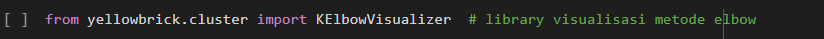

In [41]:
# Tulis di sini
from yellowbrick.cluster import KElbowVisualizer

# Load Dataset

Download dataset [di sini](https://drive.google.com/file/d/1kQhSkVx2BYYRHeGZtjjfgZTOMSf9YjhY/view?usp=sharing)

Pada hands-on ini, kita masih menggunakan dataset Mall_Customers.csv.

Berbeda dengan materi sebelumnya, kali ini, kita akan lakukan Customer Segmentation menggunakan algoritma K-Means.

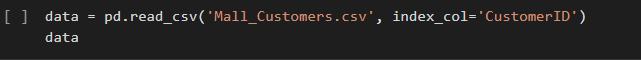

In [42]:
# Tulis di sini
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
209,Female,35,1207,79
210,Female,45,126,182
211,Male,32,126,174


Memeriksa kelengkapan dataset.

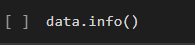

In [43]:
# Tulis di sini
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 1 to 213
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         240 non-null    object
 1   Age            240 non-null    int64 
 2   AnnualIncome   240 non-null    int64 
 3   SpendingScore  240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.4+ KB


Kita hanya memilih dua variable saja, yakni **AnnualIncome** dan **SpendingScore**.

> Note: Jika kita memilih variable Gender, maka kita perlu melakukan preprocessing terlebih dahulu.

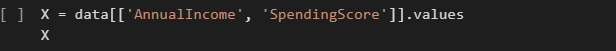

In [44]:
# Tulis di sini
X = data[['AnnualIncome', 'SpendingScore']].values
X

array([[  15,   39],
       [  15,   81],
       [  16,    6],
       [  16,   77],
       [  17,   40],
       [  17,   76],
       [  18,    6],
       [  18,   94],
       [  19,    3],
       [  19,   72],
       [  19,   14],
       [  19,   99],
       [  20,   15],
       [  20,   77],
       [  20,   13],
       [  20,   79],
       [  21,   35],
       [  21,   66],
       [  23,   29],
       [  23,   98],
       [  24,   35],
       [  24,   73],
       [  25,    5],
       [  25,   73],
       [  28,   14],
       [  28,   82],
       [  28,   32],
       [  28,   61],
       [  29,   31],
       [  29,   87],
       [  30,    4],
       [  30,   73],
       [  33,    4],
       [  33,   92],
       [  33,   14],
       [  33,   81],
       [  34,   17],
       [  34,   73],
       [  37,   26],
       [  37,   75],
       [  38,   35],
       [  38,   92],
       [  39,   36],
       [  39,   61],
       [  39,   28],
       [  39,   65],
       [  40,   55],
       [  40,

Karena standar besar/kecil di kedua variabel berbeda, maka kita perlu melakukan standarisasi terlebih dahulu menggunakan `StandardScaler`.

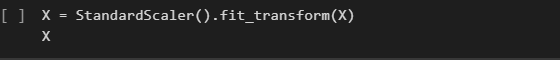

In [45]:
# Tulis di sini
X = StandardScaler().fit_transform(X)
X

array([[-4.31393298e-01, -4.21372977e-01],
       [-4.31393298e-01,  9.16824758e-01],
       [-4.24485019e-01, -1.47281405e+00],
       [-4.24485019e-01,  7.89377354e-01],
       [-4.17576739e-01, -3.89511126e-01],
       [-4.17576739e-01,  7.57515504e-01],
       [-4.10668459e-01, -1.47281405e+00],
       [-4.10668459e-01,  1.33102882e+00],
       [-4.03760179e-01, -1.56839961e+00],
       [-4.03760179e-01,  6.30068100e-01],
       [-4.03760179e-01, -1.21791925e+00],
       [-4.03760179e-01,  1.49033807e+00],
       [-3.96851899e-01, -1.18605740e+00],
       [-3.96851899e-01,  7.89377354e-01],
       [-3.96851899e-01, -1.24978110e+00],
       [-3.96851899e-01,  8.53101056e-01],
       [-3.89943619e-01, -5.48820381e-01],
       [-3.89943619e-01,  4.38896995e-01],
       [-3.76127059e-01, -7.39991486e-01],
       [-3.76127059e-01,  1.45847622e+00],
       [-3.69218779e-01, -5.48820381e-01],
       [-3.69218779e-01,  6.61929951e-01],
       [-3.62310499e-01, -1.50467591e+00],
       [-3.

# Metode Elbow

Sebelum men-training model K-Means, sebaiknya kita mencari nilai K yang paling baik/optimal terlebih dahulu.

Nilai ini bisa kita cari menggunakan Metode Elbow atau `KElbowVisualizer` pada Python.



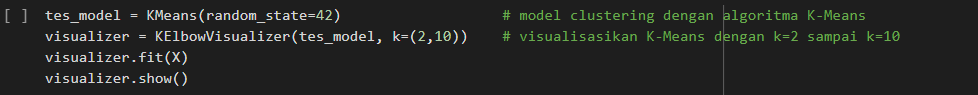

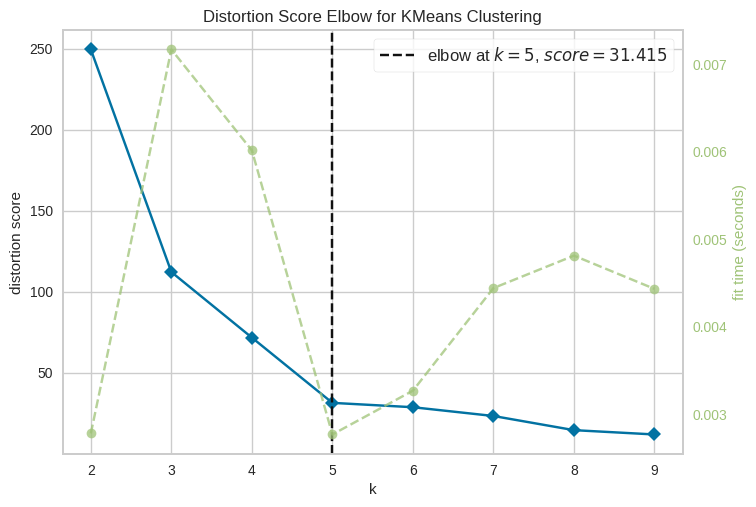

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
# Tulis di sini
tes_model = KMeans(random_state=42)
visualizer = KElbowVisualizer(tes_model, k=(2,10))
visualizer.fit(X)
visualizer.show()


Berdasarkan hasil Metode Elbow, Titik Elbow berada pada K=5.

Maka nilai K terbaik/optimal adalah 5.

# Modeling

Selanjutnya kita lakukan training model menggunakan algoritma K-Means dengan:
- cluster bejumlah 5 (K=5)
- random state bernilai 42

Random state berguna untuk mengontrol ke-random-an inisiasi centroid.


Kita juga bisa men-tuning hyperparameter K-Means lainnya. Baca dokumentasi lengkapnya [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

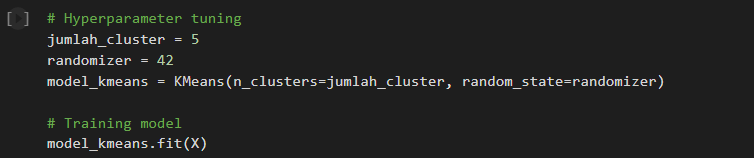

In [47]:
# Tulis di sini
jumlah_cluster = 5
randomizer = 42
model_KMeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)
model_KMeans.fit(X)


KMeans(n_clusters=5, random_state=42)

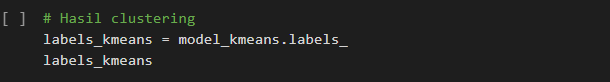

In [48]:
# Tulis di sini
labels_kmeans = model_KMeans.labels_
labels_kmeans

array([0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 0, 0, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 0, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 0, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 1, 1, 1, 1, 4, 4, 4, 4],
      dtype=int32)

Karena kita menentukan K=5 (cluster berjumlah 5), maka kita akan mendapat 5 centroid.

Informasi (letak) tiap centroid bisa kita akses menggunakan method `cluster_centers_`.

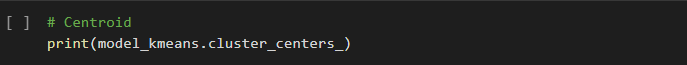

In [49]:
# Tulis di sini
print(model_KMeans.cluster_centers_)

[[-0.17079383 -0.15322869]
 [ 7.52694521 -0.11868539]
 [-0.11772005  0.91897759]
 [-0.09894748 -1.20506271]
 [ 0.37342132  4.15876808]]


# Evaluasi Model

Ada beberapa metode yang bisa kita gunakan untuk mengevaluasi model clustering, antara lain:
1. Melihat dendrogram
2. Metode elbow
3. Visualisasi data
4. Silhouette Coefficient (SC)

Dendrogram digunakan pada model AHC.
Sedangkan, metode elbow sudah kita gunakan untuk menentukan nilai K terbaik.

Selanjutnya, kita akan mengevaluasi model clustering menggunakan visualisasi data dan SC.

## Visualisasi Hasil Clustering (Visualisasi Data)

Kita bisa memvisualisasikan hasil clustering dan centroid secara bersamaan menggunaan scatter plot.

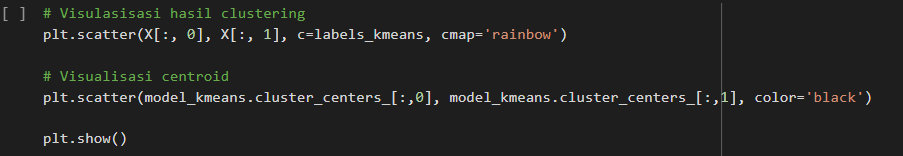

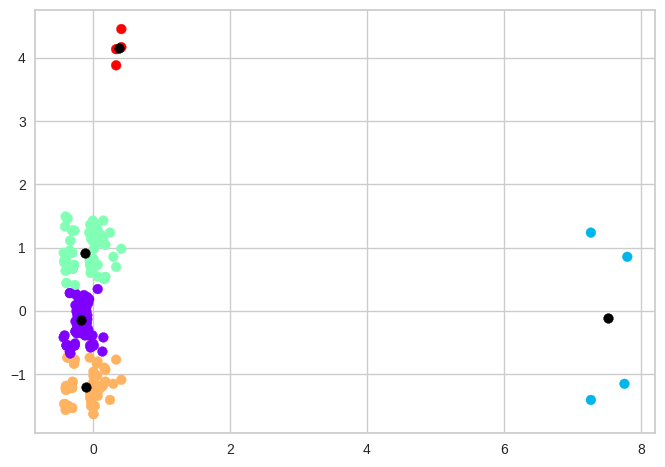

In [50]:
# Tulis di sini
plt.scatter(X[:,0],X[:,1], c= labels_kmeans, cmap='rainbow')
plt.scatter(model_KMeans.cluster_centers_[:,0], model_KMeans.cluster_centers_[:,1], color='black')
plt.show()

Terlihat hasil clustering sudah cukup bagus.

---

**Note**:
- Kita bisa memvisualisasikan dataset secara 2D karena dataset tersebut hanya terdiri dari dua variable/feature, yakni **AnnualIncome** dan **SpendingScore**.
- Jika dataset kita terdiri dari tiga variable, maka kita masih bisa memvisualisasikan dataset secara 3D.
- Namun, kita tidak akan bisa memvisualisasikan dataset dengan jumlah variable lebih dari tiga, karena visualisasinya lebih dari 3D.
- Salah satu solusi visualisasi dataset dengan jumlah variable >3 adalah reduksi dimensi (dimensionality reduction).

Materi dimensionality reduction akan kita pelajari pada domain Data Science.

## Silhouette Coefficient

Kita bisa menggunakan `silhouette_score` untuk mendapat Silhouette Score model yang telah kita training.

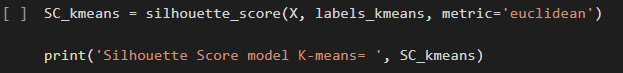

In [51]:
# Tulis si sini
SC_KMeans = silhouette_score(X, labels_kmeans, metric='euclidean')
print('Silhouette Score model K-means=', SC_KMeans)

Silhouette Score model K-means= 0.5726323363898457


Semakin Silhouette Score mendekati 1, maka model clustering akan semakin bagus.

Berdasarkan Silhouette Score, model K-Means yang telah kita training sudah cukup bagus.

Alangkah baiknya jika kita men-training lebih dari satu model clustering dengan berbagai algoritma dan tuning hyperparameter.

Kemudian, kita bandingkan Silhouette Score tiap model untuk mengetahui mana model terbagus.

# Kesimpulan

Simpan hasil clustering ke dalam dataset.

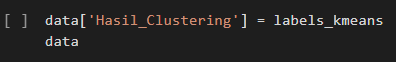

In [52]:
# Tulis di sini
data['Hasil_Clustering'] = labels_kmeans
data

,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,2
3,Female,20,16,6,3
4,Female,23,16,77,2
5,Female,31,17,40,0
...,...,...,...,...,...
209,Female,35,1207,79,1
210,Female,45,126,182,4
211,Male,32,126,174,4


**Contoh**:

Menghitung rata-rata tiap cluster untuk menarik kesimpulan.

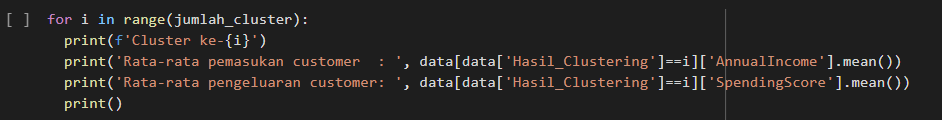

In [53]:
# Tulis di sini
for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer :', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer :', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())
  print()

Cluster ke-0
Rata-rata pemasukan customer : 52.722772277227726
Rata-rata pengeluaran customer : 47.415841584158414

Cluster ke-1
Rata-rata pemasukan customer : 1167.0
Rata-rata pengeluaran customer : 48.5

Cluster ke-2
Rata-rata pemasukan customer : 60.4054054054054
Rata-rata pengeluaran customer : 81.06756756756756

Cluster ke-3
Rata-rata pemasukan customer : 63.12280701754386
Rata-rata pengeluaran customer : 14.403508771929825

Cluster ke-4
Rata-rata pemasukan customer : 131.5
Rata-rata pengeluaran customer : 182.75



Bisa kita simpulkan bahwa :    
- Cluster 0 adalah kelompok customer menengah ke bawah yang hemat (pengeluarannya sangat kecil)
- Cluster 1 adalah kelompok customer menengah ke bawah yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 2 adalah kelompok customer tingkat atas yang hemat (pengeluarannya sangat kecil)
- Cluster 3 adalah kelompok customer menengah ke atas yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 4 adalah kelompok customer menengah ke bawah yang boros (pengeluaran hampir sama dengan pemasukan)

---

**OPEN DISCUSSION**

Jika kamu adalah pemilik toko kredit dan akan menawarkan kredit mobil, cluster manakah yang menurutmu tepat?



# Exercise (Latihan)

Boleh pilih salah satu activity atau lakukan keduanya.

## Activity 1

- Gunakan dataset Mall_Customers.csv
- Gunakan variable Age, AnnualIncome, dan SpendingScore
- Lakukan clustering menggunakan model AHC dan K-Means
- Tentukan nilai K terbaik untuk setiap model
- Bandingkan SC model K-Means dengan AHC
- Tarik kesimpulan activity dan paparkan mana model terbaik

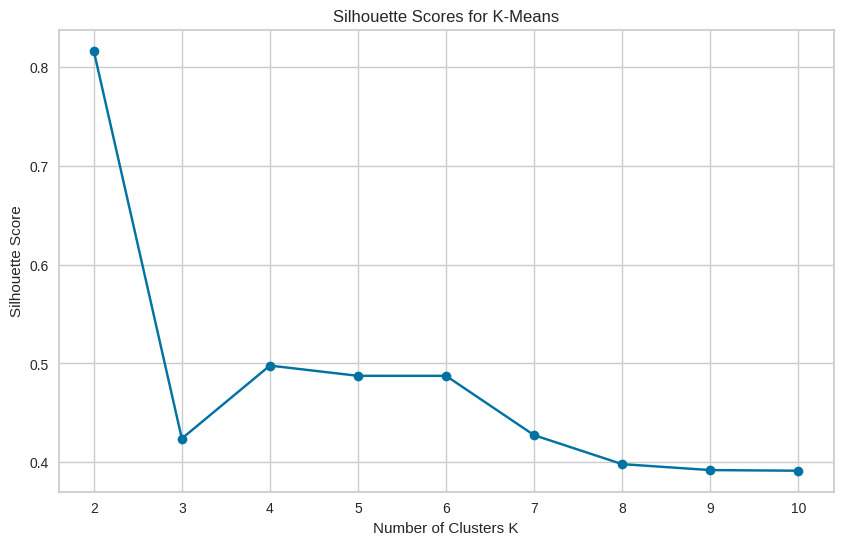

Best K for K-Means based on silhouette score: 2
Silhouette Score for K-Means: 0.8167921910291142
Silhouette Score for Agglomerative Clustering: 0.8167921910291142


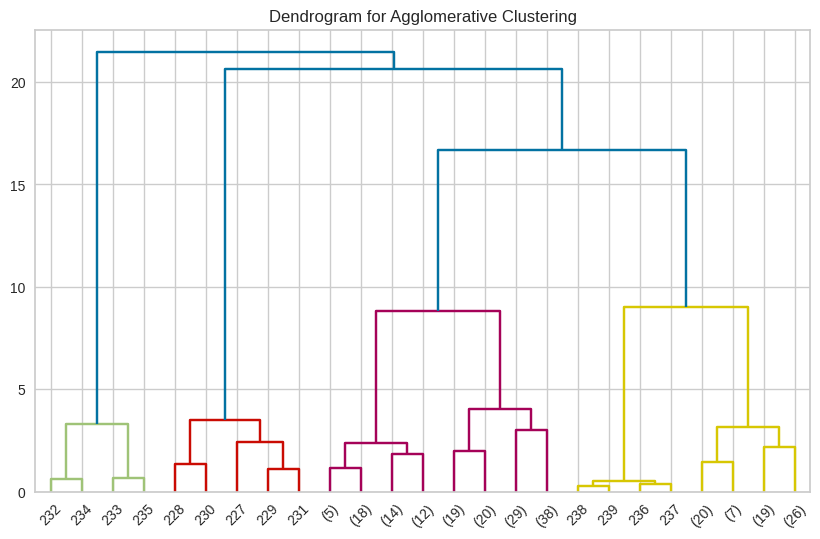

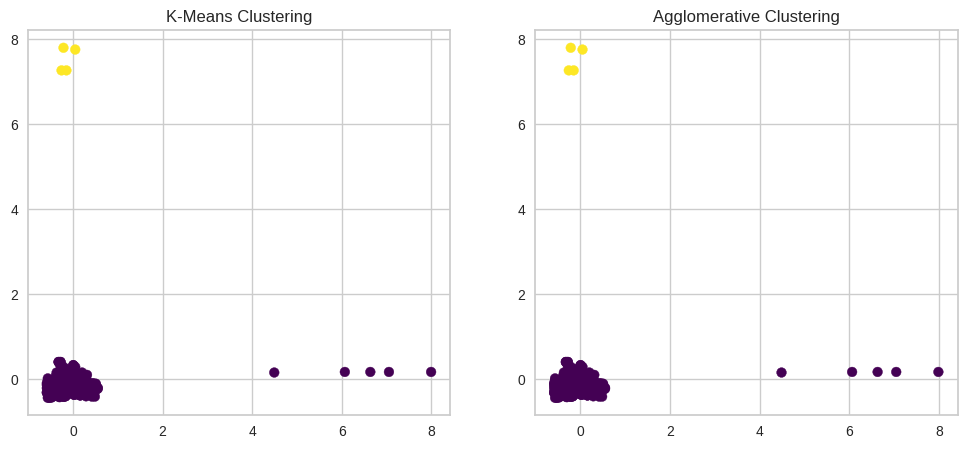

In [54]:
# Import pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Loading dataset
data = pd.read_csv('Mall_Customers.csv')

# Fitur1, Fitur2 sesuai dengan dataset Anda
X = data[['Age', 'AnnualIncome', 'SpendingScore']]

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan nilai K terbaik untuk K-Means menggunakan skor silhouette
silhouette_scores = []
for k in range(2, 11):  # Testing for K=2 to K=10
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Plot skor silhouette untuk menemukan K terbaik
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means")
plt.xlabel("Number of Clusters K")
plt.ylabel("Silhouette Score")
plt.show()

# Pilih K terbaik berdasarkan plot
best_k = np.argmax(silhouette_scores) + 2
print(f"Best K for K-Means based on silhouette score: {best_k}")

# Terapkan K-Means dengan K terbaik
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Menerapkan Clustering Agglomeratif
ahc = AgglomerativeClustering(n_clusters=best_k)
ahc_labels = ahc.fit_predict(X_scaled)

# silhouette untuk perbandingan
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
ahc_silhouette = silhouette_score(X_scaled, ahc_labels)

print(f"Silhouette Score for K-Means: {kmeans_silhouette}")
print(f"Silhouette Score for Agglomerative Clustering: {ahc_silhouette}")

# Dendrogram untuk AHC
plt.figure(figsize=(10, 6))
linked = linkage(X_scaled, 'ward')
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram for Agglomerative Clustering")
plt.show()

# plotting cluster untuk perbandingan visual
plt.figure(figsize=(12, 5))

# K-Means
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering")

# Pengelompokan Aglomeratif
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=ahc_labels, cmap='viridis')
plt.title("Agglomerative Clustering")

plt.show()


## Activity 2

1. Buat kelompok
2. Carilah dataset untuk kasus clustering di sekitarmu atau di internet
3. Lakukan clustering menggunakan algortima K-Means (ikuti step pada hands-on ini)
4. Buat kesimpulan clustering
5. Kumpulkan ke HC

   CustomerID  Gender  Age  AnnualIncome  SpendingScore
0           1    Male   19            15             39
1           2    Male   21            15             81
2           3  Female   20            16              6
3           4  Female   23            16             77
4           5  Female   31            17             40


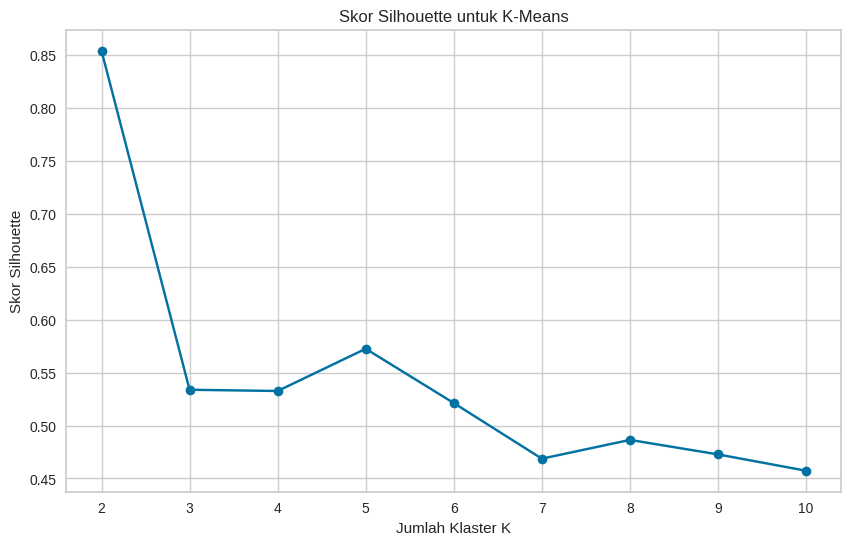

K terbaik untuk K-Means: 2
Ringkasan Clustering K-Means:
                CustomerID        Age  AnnualIncome  SpendingScore  \
KMeans_Cluster                                                       
0                96.258475  44.851695     58.978814      52.288136   
1               207.500000  38.250000   1167.000000      48.500000   

                KMeans_Cluster  
KMeans_Cluster                  
0                          0.0  
1                          1.0  


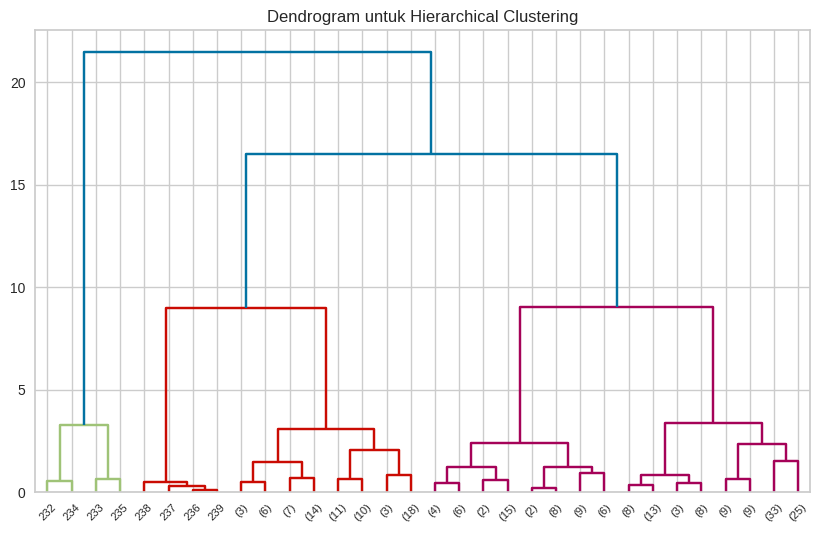

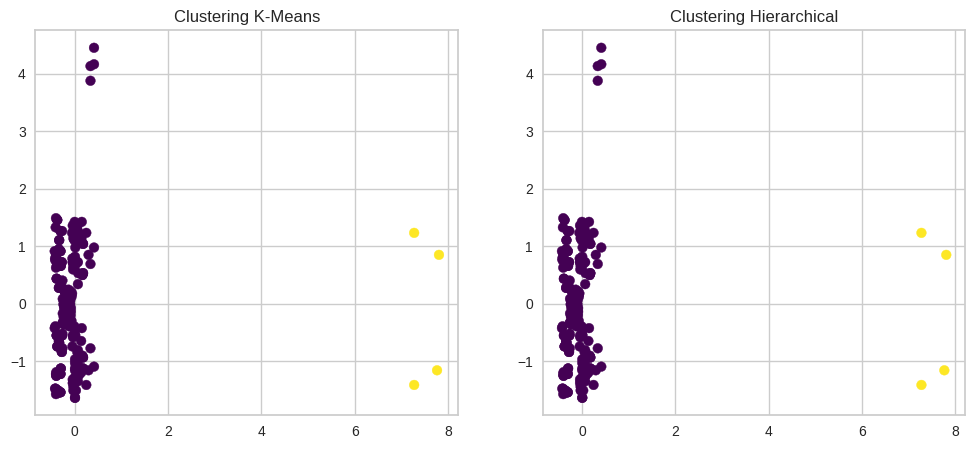

   CustomerID  Gender  Age  AnnualIncome  SpendingScore
0           1    Male   19            15             39
1           2    Male   21            15             81
2           3  Female   20            16              6
3           4  Female   23            16             77
4           5  Female   31            17             40


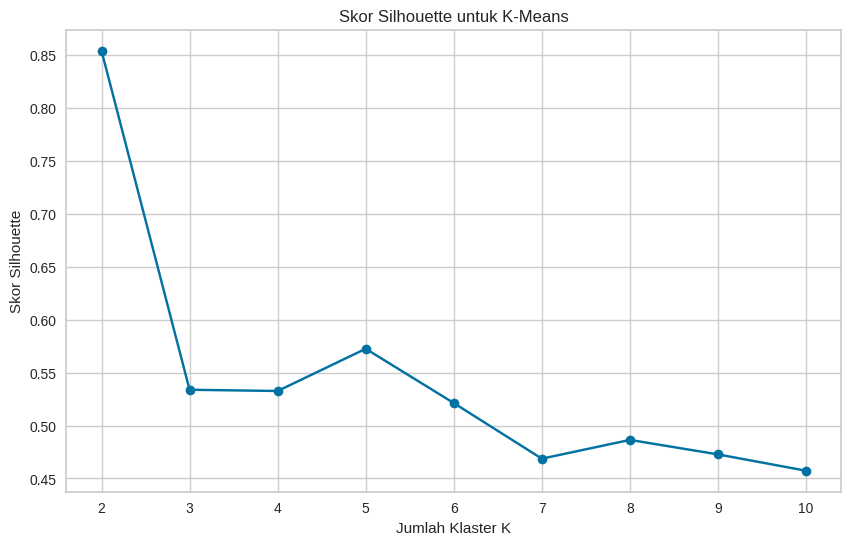

K terbaik untuk K-Means: 2
Ringkasan Clustering K-Means:
                CustomerID        Age  AnnualIncome  SpendingScore  \
KMeans_Cluster                                                       
0                96.258475  44.851695     58.978814      52.288136   
1               207.500000  38.250000   1167.000000      48.500000   

                KMeans_Cluster  
KMeans_Cluster                  
0                          0.0  
1                          1.0  


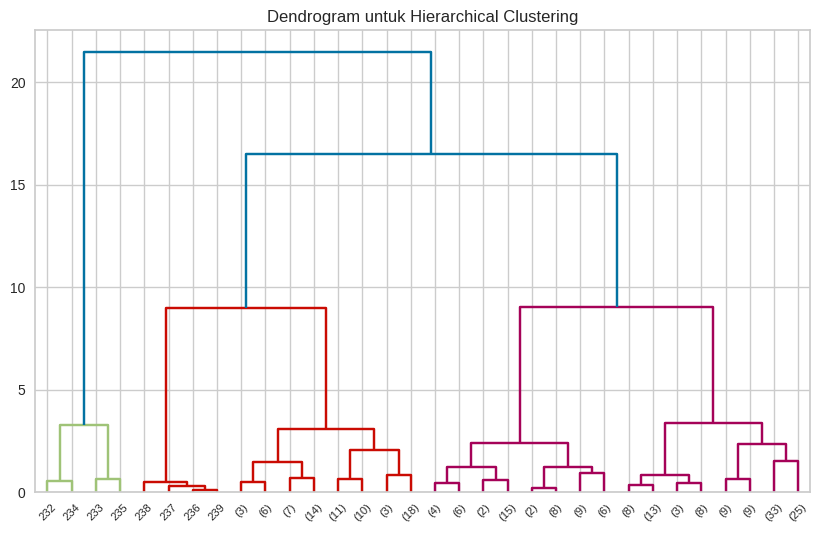

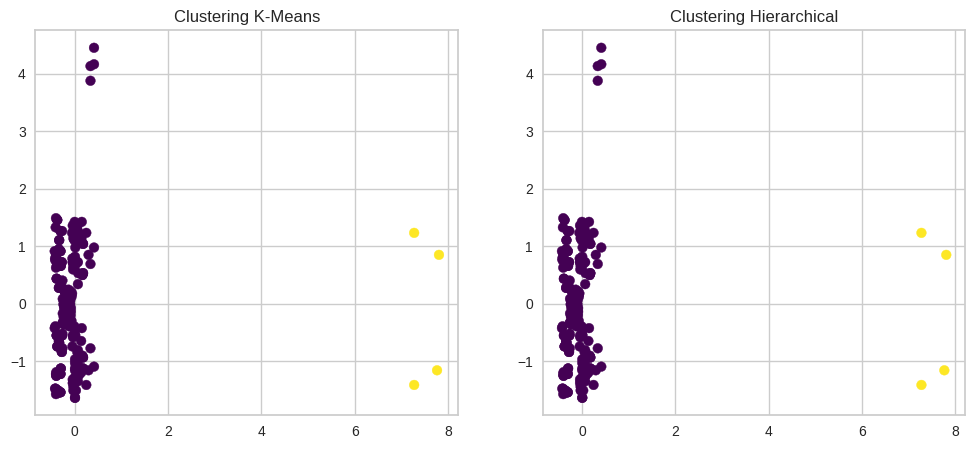

Clustering selesai. Hasil K-Means dan Hierarchical Clustering telah divisualisasikan.


In [55]:
# Import pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Load dataset
data = pd.read_csv('Mall_Customers.csv')
print(data.head())

# Fitur1, Fitur2 sesuai dengan dataset Anda
X = data[['AnnualIncome', 'SpendingScore']].values


# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan nilai K terbaik untuk K-Means menggunakan skor silhouette
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Plot skor silhouette untuk menemukan K terbaik
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Skor Silhouette untuk K-Means")
plt.xlabel("Jumlah Klaster K")
plt.ylabel("Skor Silhouette")
plt.show()

# Pilih K terbaik berdasarkan plot
best_k = np.argmax(silhouette_scores) + 2
print(f"K terbaik untuk K-Means: {best_k}")

# Terapkan K-Means dengan K terbaik
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Ringkasan hasil clustering
data['KMeans_Cluster'] = kmeans_labels
print("Ringkasan Clustering K-Means:")
# Only calculate the mean for numeric columns
print(data.groupby('KMeans_Cluster').agg({col: 'mean' for col in data.select_dtypes(include=np.number).columns}))
# Terapkan Hierarchical Clustering untuk perbandingan
ahc = AgglomerativeClustering(n_clusters=best_k)
ahc_labels = ahc.fit_predict(X_scaled)

# Tambahkan hasil klaster HC ke dataset
data['HC_Cluster'] = ahc_labels

# Plot dendrogram untuk HC
plt.figure(figsize=(10, 6))
linked = linkage(X_scaled, 'ward')
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram untuk Hierarchical Clustering")
plt.show()

# Visualisasi hasil clustering K-Means dan HC
plt.figure(figsize=(12, 5))

# Plot Clustering K-Means
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("Clustering K-Means")

# Plot Clustering Hierarchical
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=ahc_labels, cmap='viridis')
plt.title("Clustering Hierarchical")

plt.show()
# Import pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Load dataset
data = pd.read_csv('Mall_Customers.csv')
print(data.head())

# 'Fitur1', 'Fitur2' sesuai dengan dataset Anda
X = data[['AnnualIncome', 'SpendingScore']].values


# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan nilai K terbaik untuk K-Means menggunakan skor silhouette
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Plot skor silhouette untuk menemukan K terbaik
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Skor Silhouette untuk K-Means")
plt.xlabel("Jumlah Klaster K")
plt.ylabel("Skor Silhouette")
plt.show()

# Pilih K terbaik berdasarkan plot
best_k = np.argmax(silhouette_scores) + 2
print(f"K terbaik untuk K-Means: {best_k}")

# Terapkan K-Means dengan K terbaik
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Ringkasan hasil clustering
data['KMeans_Cluster'] = kmeans_labels
print("Ringkasan Clustering K-Means:")
# Only calculate the mean for numeric columns
print(data.groupby('KMeans_Cluster').agg({col: 'mean' for col in data.select_dtypes(include=np.number).columns}))
# Terapkan Hierarchical Clustering untuk perbandingan
ahc = AgglomerativeClustering(n_clusters=best_k)
ahc_labels = ahc.fit_predict(X_scaled)

# Tambahkan hasil klaster HC ke dataset
data['HC_Cluster'] = ahc_labels

# Plot dendrogram untuk HC
plt.figure(figsize=(10, 6))
linked = linkage(X_scaled, 'ward')
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram untuk Hierarchical Clustering")
plt.show()

# Visualisasi hasil clustering K-Means dan HC
plt.figure(figsize=(12, 5))

# Plot Clustering K-Means
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("Clustering K-Means")

# Plot Clustering Hierarchical
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=ahc_labels, cmap='viridis')
plt.title("Clustering Hierarchical")

plt.show()

# Kesimpulan
print("Clustering selesai. Hasil K-Means dan Hierarchical Clustering telah divisualisasikan.")